# Análisis exploratorio de datos

In [101]:
# Importamos librerías:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [102]:
# Importamos los datos:
data_train = pd.read_csv('/content/drive/MyDrive/Apuntes Concentración Ciencia de Datos e IA/Reto/19 ago/train_motion_data.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Apuntes Concentración Ciencia de Datos e IA/Reto/19 ago/test_motion_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Apuntes Concentración Ciencia de Datos e IA/Reto/19 ago/train_motion_data.csv'

In [ ]:
# Revisamos el set de entrenamiento:
data_train.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [ ]:
data_train.sort_values(["Timestamp"])

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [ ]:
data_train.sort_values(["Timestamp"]).loc[data_train.Class == "NORMAL"]

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
1195,-0.820672,2.556599,-0.617599,-0.031612,-0.865596,-0.962189,NORMAL,3582274
1197,2.488864,-1.001262,0.432143,0.140041,-0.080023,0.051847,NORMAL,3582275
1196,-0.016871,1.171574,0.603792,0.253662,0.692110,0.537485,NORMAL,3582275
1198,-0.680338,-0.048300,-3.298533,-0.169057,-0.383012,0.217392,NORMAL,3582276


In [ ]:
# Revisamos el set de prueba:
data_test.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924


In [ ]:
# Lógicamente, ambos sets describen el mismo fenómeno y cuentan con las mismas características.
# Imprimimos las columnas (o variables) involucradas:
data_train.columns

Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class',
       'Timestamp'],
      dtype='object')

In [ ]:
# Observamos si hay datos faltantes (en el caso del set de entrenamiento):
pd.isna(data_train).sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [ ]:
# Observamos si hay datos faltantes (en el caso del set de prueba):
pd.isna(data_test).sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [ ]:
# No habrán de imputarse los datos en ningún momento del análisis.

# Observamos de manera gráfica un primer vistazo de la distribución de los datos:

# Realizamos ploteos entre pares:
sns.pairplot(data_train, vars=["AccX","AccY","AccZ","GyroX", "GyroY", "GyroZ", "Timestamp"])

In [ ]:
# Se observan diversos comportamientos entre variables, existiendo relaciones de diversos tipos entre ellas.

# Computamos e imprimimos estadísticas basadas en las clases que nos presenta el reto (tipo de conducta de manejo)

# Categorías
print( data_train['Class'].unique() )

# Conteo por categoría
print( data_train['Class'].value_counts() )

# Proporciones de datos existentes por categoría
Nc1      = len(data_train[data_train['Class']=='SLOW'])
Nc2      = len(data_train[data_train['Class']=='NORMAL'])
Nc3      = len(data_train[data_train['Class']=='AGGRESSIVE'])
Ntotal   = Nc1 + Nc2 + Nc3

pct_Nc1  = Nc1 / Ntotal
pct_Nc2  =  Nc2 / Ntotal
pct_Nc3  = Nc3 / Ntotal
print("Proporción de SLOW       es {0:0.1f}%".format(pct_Nc1*100))
print("Proporción de NORMAL     es {0:0.1f}%".format(pct_Nc2*100))
print("Proporción of AGGRESSIVE es {0:0.1f}%".format(pct_Nc3*100))

['NORMAL' 'AGGRESSIVE' 'SLOW']
SLOW          1331
NORMAL        1200
AGGRESSIVE    1113
Name: Class, dtype: int64
Proporción de SLOW       es 36.5%
Proporción de NORMAL     es 32.9%
Proporción of AGGRESSIVE es 30.5%


In [ ]:
# Observamos que los datos no se encuentran balanceados, por lo que habrá que tomar medidas de balanceo.

# Codificamos la etiqueta de cada clase en todas las ocurrencias del conjunto de registros
data_train.Class = [2 if i == 'NORMAL' else 3 if i == 'AGGRESSIVE' else 1 for i in data_train.Class]

# Visualización del conjunto de datos con la clase codificada
data_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,2,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,2,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,2,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,2,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,2,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,1,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,1,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,1,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,1,3583791


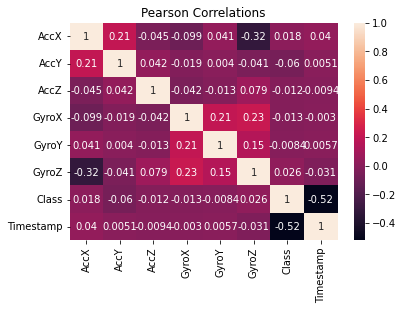

In [ ]:
# Calculamos la correlación entre variables:
ax = sns.heatmap(data_train.corr(), annot=True).set(title='Pearson Correlations');

In [ ]:
# Graficando aceleración en X y giroscopio en Z, clasificados en función de Class

accXSLOW = data_train.loc[data_train.Class == 1]
accXNORMAL = data_train.loc[data_train.Class == 2]
accXAGGRESSIVE = data_train.loc[data_train.Class == 3]

In [ ]:
data_train2 = pd.read_csv('/content/drive/MyDrive/Apuntes Concentración Ciencia de Datos e IA/Reto/19 ago/train_motion_data.csv')

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


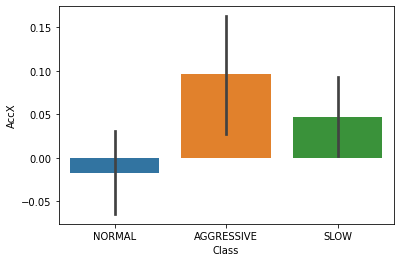

In [ ]:
ax = sns.barplot(x="Class", y="AccX", data=data_train2)

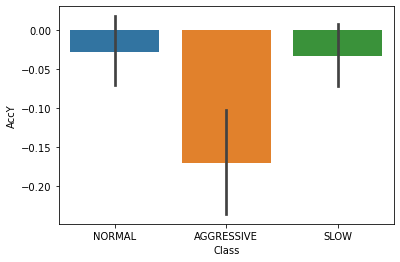

In [ ]:
ax3 = sns.barplot(x="Class", y="AccY", data=data_train2)

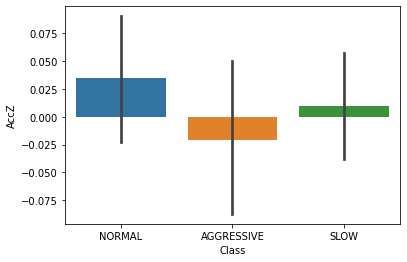

In [ ]:
ax3 = sns.barplot(x="Class", y="AccZ", data=data_train2)

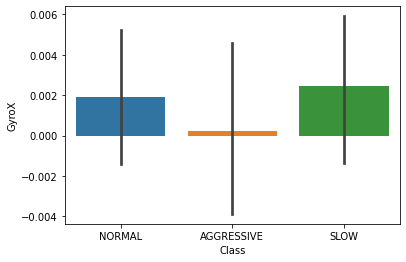

In [ ]:
ax3 = sns.barplot(x="Class", y="GyroX", data=data_train2)

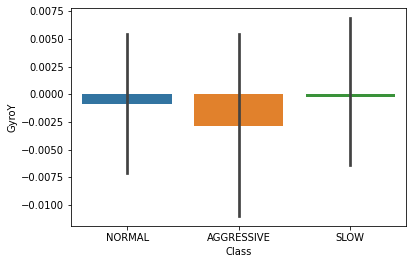

In [ ]:
ax3 = sns.barplot(x="Class", y="GyroY", data=data_train2)

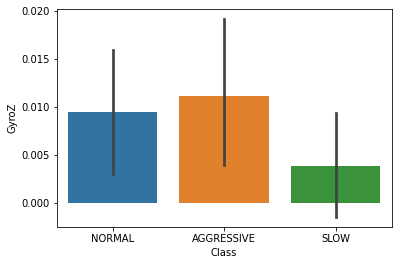

In [ ]:
ax2 = sns.barplot(x="Class", y="GyroZ", data=data_train2)

# Implementación del modelo de Random Forest

### Tres clases: SLOW, NORMAL y AGGRESSIVE

In [ ]:
# AccX distingue entre manejo etiquetado como normal (valores negativos) los otros dos estilos.
# AccZ distingue entre manejo etiquetado como agresivo (valores negativos) y los otros dos estilos.

# Implementamos Random Forest
X = data_train[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]  
X

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902
...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963


In [ ]:
y = data_train['Class']  # Labels
y

0       2
1       2
2       2
3       2
4       2
       ..
3639    1
3640    1
3641    1
3642    1
3643    1
Name: Class, Length: 3644, dtype: int64

In [ ]:
X_test = data_test[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
X_test

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277
...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073


In [ ]:
# Codificamos la etiqueta de cada clase en todas las ocurrencias del conjunto de registros (tres clases)
data_test.Class = [2 if i == 'NORMAL' else 3 if i == 'AGGRESSIVE' else 1 for i in data_test.Class]

y_test = data_test['Class']
y_test

0       3
1       3
2       3
3       3
4       3
       ..
3079    1
3080    1
3081    1
3082    1
3083    1
Name: Class, Length: 3084, dtype: int64

In [ ]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
norm_train_data_X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
norm_test_data_X = pd.DataFrame(sc.fit_transform(X_test), columns = X_test.columns)

# Importamos el modelo de Random Forest desde sklearn
from sklearn.ensemble import RandomForestClassifier

# Creamos una instancia del clasificador
clf = RandomForestClassifier(n_estimators=500, max_depth=8, max_features=2)

# Entrenamos el modelo
clf.fit(norm_train_data_X,y)

# Predecimos la salida con base en los datos de entrada (3 clases)
y_pred = clf.predict(X_test)

# Obtenemos la puntuación del modelo
clf.score(X_test,y_test)

0.47341115434500647

In [ ]:
# Imprimimos métricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred))

Matriz de confusión:
 [[1126   45  102]
 [ 778   46  173]
 [ 496   30  288]]


In [ ]:
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))
print('\nAccuracy score:\n', accuracy_score(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.47      0.88      0.61      1273
           2       0.38      0.05      0.08       997
           3       0.51      0.35      0.42       814

    accuracy                           0.47      3084
   macro avg       0.45      0.43      0.37      3084
weighted avg       0.45      0.47      0.39      3084


Accuracy score:
 0.47341115434500647


### Random Forest acotado a dos clases (SLOW-NORMAL y AGGRESSIVE)

In [ ]:
# Importamos los datos 
data_train_dropslow = pd.read_csv('/content/drive/MyDrive/Apuntes Concentración Ciencia de Datos e IA/Reto/19 ago/train_motion_data.csv')
data_test_dropslow = pd.read_csv('/content/drive/MyDrive/Apuntes Concentración Ciencia de Datos e IA/Reto/19 ago/test_motion_data.csv')

# Codificamos la etiqueta de cada clase en todas las ocurrencias del conjunto de registros
data_train_dropslow.Class = [0 if i == 'NORMAL' else 1 if i == 'AGGRESSIVE' else 0 for i in data_train_dropslow.Class]
data_test_dropslow.Class = [0 if i == 'NORMAL' else 1 if i == 'AGGRESSIVE' else 0 for i in data_test_dropslow.Class]

# Separamos variables
X_tr_dr = data_train_dropslow[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]  # Features
y_tr_dr = data_train_dropslow['Class']  # Labels

X_te_dr = data_test_dropslow[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]  # Features
y_te_dr = data_test_dropslow['Class']  # Labels

# Normalizamos los datos
sc2 = StandardScaler()
norm_train_data_X_dr = pd.DataFrame(sc2.fit_transform(X_tr_dr), columns = X_tr_dr.columns)
norm_test_data_X_dr = pd.DataFrame(sc2.fit_transform(X_te_dr), columns = X_te_dr.columns)

# Importamos el modelo de Random Forest desde sklearn
from sklearn.ensemble import RandomForestClassifier

# Creamos una instancia del clasificador
clf2 = RandomForestClassifier(n_estimators=10000)

# Entrenamos el modelo
clf2.fit(norm_train_data_X_dr,y_tr_dr)

# Obtenemos la puntuación del modelo
clf2.score(X_tr_dr,y_tr_dr)

1.0

In [ ]:
# Predecimos la salida con base en los datos de entrada (2 clases)
y_pred_dr = clf2.predict(X_te_dr)

# Imprimimos métricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Matriz de confusión:\n', confusion_matrix(y_te_dr, y_pred_dr, labels=[0, 1]))

Matriz de confusión:
 [[3084]]


In [ ]:
print('\nReporte de clasificación:\n', classification_report(y_te_dr, y_pred_dr))
print('\nAccuracy score:\n', accuracy_score(y_te_dr, y_pred_dr))


Reporte de clasificación:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00      3084

    accuracy                           1.00      3084
   macro avg       1.00      1.00      1.00      3084
weighted avg       1.00      1.00      1.00      3084


Accuracy score:
 1.0


In [ ]:
# Matriz de confusión a color
CM2     = confusion_matrix(y_te_dr, y_pred_dr, normalize = 'true')
fig, axes = plt.subplots(1, 2, figsize=(16, 3), sharey=True)

sns.heatmap(CM2, annot=True, fmt='g', ax=axes[0], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[0].set_title('Matriz de confusión:')

# Implementación de KNN y regresión logística

Se junta la clase 'SLOW' con 'NORMAL' y se elimina el ruido presente en los datos para una mejor presición en los modelos

In [ ]:
data_train_normal = data_train.loc[data_train['Class'] == 'NORMAL']
data_train_slow = data_train.loc[data_train['Class'] == 'SLOW']
data_train_aggressive = data_train.loc[data_train['Class'] == 'AGGRESSIVE']

data_train_slow = data_train_slow.iloc[12:]
data_train_slow = data_train_slow.iloc[:-12]

data_train_normal = data_train_normal.iloc[12:]
data_train_normal = data_train_normal.iloc[:-12]

data_train_aggressive = data_train_aggressive.iloc[12:]
data_train_aggressive = data_train_aggressive.iloc[:-12]

frames = [data_train_slow, data_train_normal, data_train_aggressive]

data_train = pd.DataFrame()

data_train = pd.concat(frames)

In [ ]:
data_train.drop(data_train[data_train['AccX'] > 2.5].index, inplace = True)
data_train.drop(data_train[data_train['AccX'] < -2.5].index, inplace = True)

data_train.drop(data_train[data_train['AccY'] > 2.5].index, inplace = True)
data_train.drop(data_train[data_train['AccY'] < -2.5].index, inplace = True)

data_train.drop(data_train[data_train['AccZ'] > 2.5].index, inplace = True)
data_train.drop(data_train[data_train['AccZ'] < -2.5].index, inplace = True)

data_train.drop(data_train[data_train['GyroX'] > 0.4].index, inplace = True)
data_train.drop(data_train[data_train['GyroX'] < -0.4].index, inplace = True)

data_train.drop(data_train[data_train['GyroY'] > 0.4].index, inplace = True)
data_train.drop(data_train[data_train['GyroY'] < -0.4].index, inplace = True)

data_train.drop(data_train[data_train['GyroZ'] > 0.4].index, inplace = True)
data_train.drop(data_train[data_train['GyroZ'] < -0.4].index, inplace = True)

In [ ]:
data_train = data_train.replace({"Class": {"SLOW":0, "NORMAL":0, "AGGRESSIVE":1}})
test_motionDf = data_test.replace({"Class": {"SLOW":0, "NORMAL":0, "AGGRESSIVE":1}})

Se normalizan los datos

In [ ]:
# Initialize scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(data_train[['AccX']])

data_train['AccX_Scaled'] = scaler.transform(data_train[['AccX']])

scaler.fit(data_train[['AccY']])

data_train['AccY_Scaled'] = scaler.transform(data_train[['AccY']])

scaler.fit(data_train[['AccZ']])

data_train['AccZ_Scaled'] = scaler.transform(data_train[['AccZ']])

scaler.fit(data_train[['GyroX']])

data_train['GyroX_Scaled'] = scaler.transform(data_train[['GyroX']])

scaler.fit(data_train[['GyroY']])

data_train['GyroY_Scaled'] = scaler.transform(data_train[['GyroY']])

scaler.fit(data_train[['GyroZ']])

data_train['GyroZ_Scaled'] = scaler.transform(data_train[['GyroZ']])
data_train

In [ ]:
# Initialize scaler
scaler = MinMaxScaler()

scaler.fit(data_test[['AccX']])

data_test['AccX_Scaled'] = scaler.transform(data_test[['AccX']])

scaler.fit(data_test[['AccY']])

data_test['AccY_Scaled'] = scaler.transform(data_test[['AccY']])

scaler.fit(data_test[['AccZ']])

data_test['AccZ_Scaled'] = scaler.transform(data_test[['AccZ']])

scaler.fit(data_test[['GyroX']])

data_test['GyroX_Scaled'] = scaler.transform(data_test[['GyroX']])

scaler.fit(data_test[['GyroY']])

data_test['GyroY_Scaled'] = scaler.transform(data_test[['GyroY']])

scaler.fit(data_test[['GyroZ']])

data_test['GyroZ_Scaled'] = scaler.transform(data_test[['GyroZ']])
data_test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Xtrain = data_train[['AccX_Scaled', 'AccY_Scaled', 'AccZ_Scaled', 'GyroX_Scaled', 'GyroY_Scaled', 'GyroZ_Scaled']].values

ytrain = data_train['Class'].values

Xtest = data_test[['AccX_Scaled', 'AccY_Scaled', 'AccZ_Scaled', 'GyroX_Scaled', 'GyroY_Scaled', 'GyroZ_Scaled']].values

ytest = data_test['Class'].values

KNN Learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

clf_kNN1ve    = KNeighborsClassifier(n_neighbors=50)
clf_kNN5ve    = KNeighborsClassifier(n_neighbors=100)
clf_kNN20ve    = KNeighborsClassifier(n_neighbors=150)

clf_kNN1ve.fit( Xtrain , ytrain )
clf_kNN5ve.fit( Xtrain , ytrain )
clf_kNN20ve.fit( Xtrain , ytrain )

ypred_kNN1ve  = clf_kNN1ve.predict(Xtest)
ypred_kNN5ve  = clf_kNN5ve.predict(Xtest)
ypred_kNN20ve  = clf_kNN20ve.predict(Xtest)


#print("Predictions in order")
#print(ypred_kNN1ve)
#print(ypred_kNN5ve)
#print(ypred_kNN20ve)

#print("\nReal data")
#print(ytest)

acc_kNN1ve    = 100*accuracy_score(ytest, ypred_kNN1ve)
acc_kNN5ve    = 100*accuracy_score(ytest, ypred_kNN5ve)
acc_kNN20ve    = 100*accuracy_score(ytest, ypred_kNN20ve)
print("\nAccuracy kNN with k=50:         {:.2f} %".format(acc_kNN1ve) )
print("Accuracy kNN with k=100:         {:.2f} %".format(acc_kNN5ve) )
print("Accuracy kNN with k=150:        {:.2f} %".format(acc_kNN20ve))

print('\nConfusion Matrices for every k used:')

CM_kNN1ve     = confusion_matrix(ytest, ypred_kNN1ve, normalize='true')
CM_kNN5ve     = confusion_matrix(ytest, ypred_kNN5ve, normalize='true')
CM_kNN20ve     = confusion_matrix(ytest, ypred_kNN20ve, normalize='true')

fig, axes = plt.subplots(1, 3, figsize=(16, 3), sharey=True)

sns.heatmap(CM_kNN5ve, annot=True, fmt='g', ax=axes[0], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[0].set_title('kNN with k=50'); 

sns.heatmap(CM_kNN5ve, annot=True, fmt='g', ax=axes[1], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[1].set_title('kNN with k=100'); 

sns.heatmap(CM_kNN20ve, annot=True, fmt='g', ax=axes[2], cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
axes[2].set_title('kNN with k=150'); 

plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0)
logistic.fit(Xtrain, ytrain)
y_predLR = logistic.predict(Xtest)
#print("Prediction")
#print(y_predLR)
#print("\nReal data")
#print(ytest)
acc = 100*accuracy_score(y_predLR, ytest)
print('Accuracy: ', acc)

Multi-Layer Perceptron Classifier